Q1:Equalize the histogram of the 8 × 8 image below. The image has grey levels 0, 1, . . . , 7.

Visualize both the original and equalized images

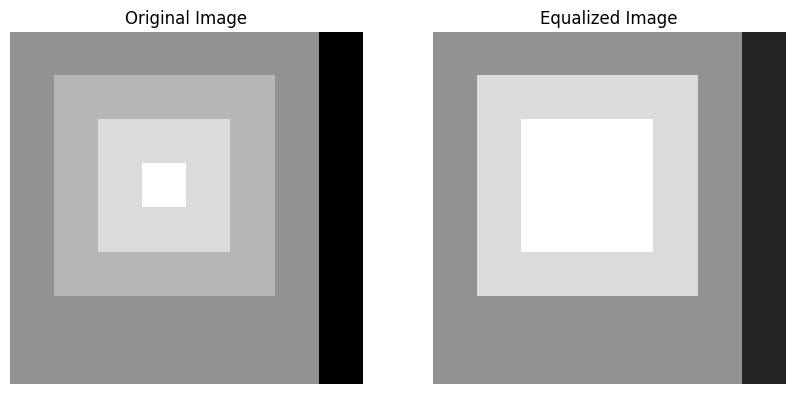

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Original image array
original_image = np.array([
    [4, 4, 4, 4, 4, 4, 4, 0],
    [4, 5, 5, 5, 5, 5, 4, 0],
    [4, 5, 6, 6, 6, 5, 4, 0],
    [4, 5, 6, 7, 6, 5, 4, 0],
    [4, 5, 6, 6, 6, 5, 4, 0],
    [4, 5, 5, 5, 5, 5, 4, 0],
    [4, 4, 4, 4, 4, 4, 4, 0],
    [4, 4, 4, 4, 4, 4, 4, 0]
])

# Equalized image based on histogram equalization
equalized_image = np.array([
    [4, 4, 4, 4, 4, 4, 4, 1],
    [4, 6, 6, 6, 6, 6, 4, 1],
    [4, 6, 7, 7, 7, 6, 4, 1],
    [4, 6, 7, 7, 7, 6, 4, 1],
    [4, 6, 7, 7, 7, 6, 4, 1],
    [4, 6, 6, 6, 6, 6, 4, 1],
    [4, 4, 4, 4, 4, 4, 4, 1],
    [4, 4, 4, 4, 4, 4, 4, 1]
])

# Plot the original and equalized images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display original image
axs[0].imshow(original_image, cmap='gray', vmin=0, vmax=7)
axs[0].set_title("Original Image")
axs[0].axis('off')

# Display equalized image
axs[1].imshow(equalized_image, cmap='gray', vmin=0, vmax=7)
axs[1].set_title("Equalized Image")
axs[1].axis('off')

plt.show()
